# Negative auto regulation speeds up response times
Rosenfeld et al. (2002) show how autoregulatory negative feedback systems can speed up response time to steady-state in an energetically efficient manner.

http://www.sciencedirect.com/science/article/pii/S0022283602009944

## Unregulated system
In an unregulated system:

\begin{equation}
f_{unreg}(x)=\frac{dx}{dt}=A-\alpha x\\
\end{equation}

where $x$ is the protein repressor concentration, $A$ is the production rate, and $\alpha$ is the growth rate. The 1st term on the RHS is the production of protein, while the 2nd term is the dilution rate of the protein as the cell divides and grows.

Assuming that $A$ is a constant $\beta$, we solve for the steady-state concentration ($x^*$):

\begin{equation}
f_{unreg}(x^*)=\frac{dx}{dt}=0=\beta -\alpha x^*\\
\end{equation}
\begin{equation}
x^*=\beta /\alpha
\end{equation}

## Regulated system
For a regulated system, the production rate term is made into a Michaelis-Menten-like form for the activity of the promoter:

\begin{equation}
A=\frac{\beta}{1+\frac{x}{k}}
\end{equation}

where $\beta$ is the protein production rate for a fully induced promoter, and $k$ is the dissociation constant of the repressor to the promoter. So that the rate equation is:

\begin{equation}
f_{reg}(x)=\frac{dx}{dt}=\frac{\beta}{1+\frac{x}{k}}-\alpha x\\
\end{equation}

The steady-state concentration of the regulated system is:

\begin{equation}
\frac{dx}{dt}=0=\frac{\beta}{1+\frac{x^*}{k}}-\alpha x^*\\
\end{equation}
\begin{equation}
0=x^{*2}+kx^*-\frac{k\beta}{\alpha }\\
\end{equation}
\begin{equation}
x^*=\frac{-k+\sqrt{k^2+4k\beta /\alpha }}{2}
\end{equation}

### At the same steady-state, a stronger promoter is needed for the regulated system
Denoting a subscript 1 for the unregulated system and subscript 2 for the regulated system:

\begin{equation}
x^*_1=\beta _1/\alpha \\
\end{equation}
\begin{equation}
x^*_2=\frac{-k+\sqrt{k^2+4k\beta _2 /\alpha }}{2}\\
\end{equation}
\begin{equation}
x^*_1=x^*_2\\
\end{equation}
\begin{equation}
\frac{\beta _1}{\alpha}=\frac{-k+\sqrt{k^2+4k\beta _2 /\alpha }}{2} \\
\end{equation}
\begin{equation}
\beta _1=\frac{-k\alpha +\alpha \sqrt{k^2+4k\beta _2 /\alpha }}{2} \\
\end{equation}

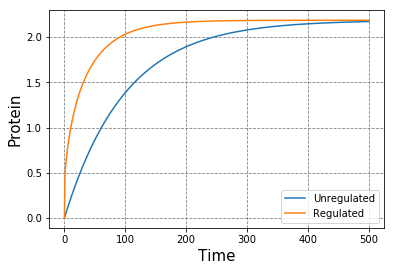

In [22]:
import math

def unreg(beta_1,alpha,x_1,dt):
    return (beta_1-alpha*x_1[-1])*dt
def reg(beta_2,alpha,k,x_2,dt):
    return ((beta_2/(1+(x_2[-1]/k)))-(alpha*x_2[-1]))*dt

x_1=[0]
x_2=[0]
beta_2=0.5
alpha=0.01
k=0.1
t_max=500
t=[0]
dt=1
beta_1=((-k*alpha)+alpha*math.sqrt((k*k)+((4*k*beta_2)/alpha)))/2

while t[-1]<t_max:
    x_1.append(x_1[-1]+unreg(beta_1,alpha,x_1,dt))
    x_2.append(x_2[-1]+reg(beta_2,alpha,k,x_2,dt))
    t.append(t[-1]+dt)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t,x_1,label='Unregulated')
plt.plot(t,x_2,label='Regulated')
plt.xlabel('Time',size=15)
plt.ylabel('Protein',size=15)
plt.grid(b=True,which='major',color='grey',linestyle='--')
plt.legend()
plt.show()

### Feedback-regulation has a faster response against perturbations from steady-state.

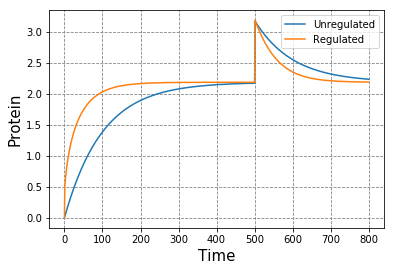

In [3]:
import math

def unreg(beta_1,alpha,x_1,dt,pert):
    return ((beta_1-alpha*x_1[-1])+pert)*dt
def reg(beta_2,alpha,k,x_2,dt,pert):
    return (((beta_2/(1+(x_2[-1]/k)))-(alpha*x_2[-1]))+pert)*dt

x_1=[0]
x_2=[0]
beta_2=0.5
alpha=0.01
k=0.1
t_max=800
t=[0]
dt=1
beta_1=((-k*alpha)+alpha*math.sqrt((k*k)+((4*k*beta_2)/alpha)))/2

while t[-1]<t_max:
    if t[-1]==500:
        pert=1
    else:
        pert=0
    x_1.append(x_1[-1]+unreg(beta_1,alpha,x_1,dt,pert))
    x_2.append(x_2[-1]+reg(beta_2,alpha,k,x_2,dt,pert))
    t.append(t[-1]+dt)
    
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t,x_1,label='Unregulated')
plt.plot(t,x_2,label='Regulated')
plt.xlabel('Time',size=15)
plt.ylabel('Protein',size=15)
plt.grid(b=True,which='major',color='grey',linestyle='--')
plt.legend()
plt.show()